# NOAA UFS Replay on Google Cloud Storage (GCS)

## 1/4 Degree Atmosphere Fields

There's currently 30 years (1994 - 2023) of 1/4 degree Atmosphere (FV3) data at 3 hour frequency on GCS

In [1]:
import xarray as xr

In [2]:
ds = xr.open_zarr(
    "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)

In [3]:
ds

<xarray.Dataset>
Dimensions:       (time: 87020, pfull: 127, grid_yt: 768, grid_xt: 1536)
Coordinates:
    cftime        (time) object dask.array<chunksize=(21755,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] dask.array<chunksize=(21755,), meta=np.ndarray>
  * grid_xt       (grid_xt) float64 0.0 0.2344 0.4688 ... 359.3 359.5 359.8
  * grid_yt       (grid_yt) float64 89.82 89.59 89.35 ... -89.35 -89.59 -89.82
  * pfull         (pfull) float32 0.01278 0.02033 0.03177 ... 993.5 996.2 998.8
  * time          (time) datetime64[ns] 1993-12-31T18:00:00 ... 2023-10-13T03...
Data variables: (12/45)
    clwmr         (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    delz          (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    dpres         (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    dswrf_avetoa  (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    dzdt          (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    f10m          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    ...            ...
    uswrf_avetoa  (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    veg           (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    vgrd          (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    vgrd10m       (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    vtype         (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    weasd         (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>

Chunksizes are as follows

In [4]:
# 3D variables ~600 MB
ds.tmp.encoding["preferred_chunks"]

{'time': 1, 'pfull': 127, 'grid_yt': 768, 'grid_xt': 1536}

In [5]:
# 2D variables ~4 MB
ds.tmp2m.encoding["preferred_chunks"]

{'time': 1, 'grid_yt': 768, 'grid_xt': 1536}

CPU times: user 4.05 s, sys: 359 ms, total: 4.41 s
Wall time: 2.84 s


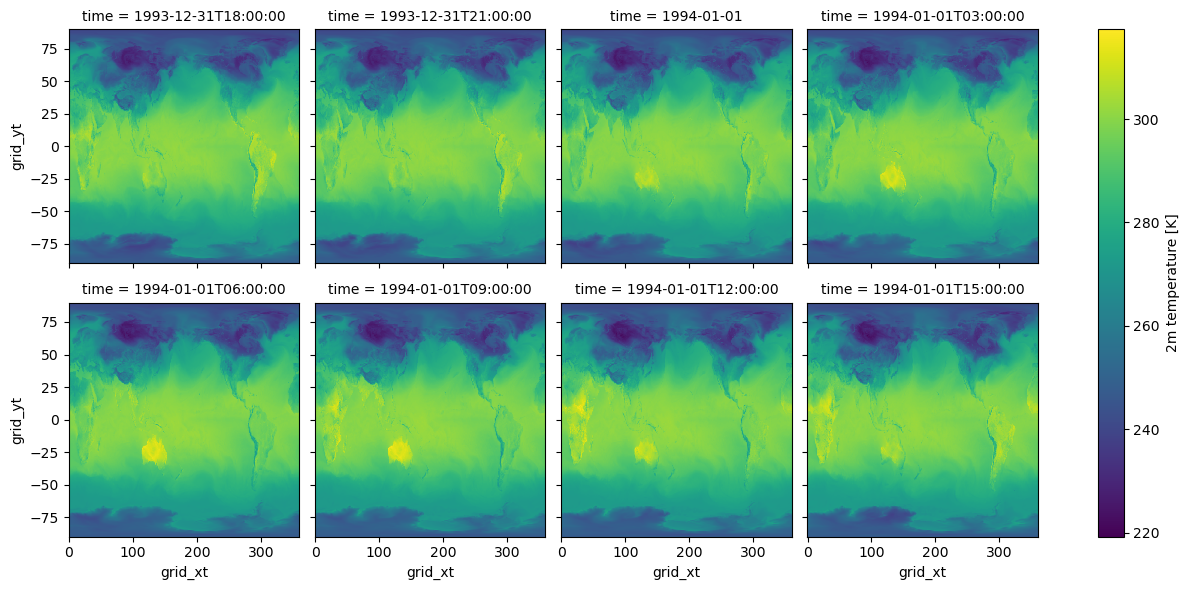

In [6]:
%%time
ds.tmp2m.isel(time=slice(8)).plot(col="time", col_wrap=4)

## 1 Degree Atmosphere Fields

There's currently 5.5 years (1994 - June 1999) of 1 degree Atmosphere (FV3) data at 3 hour frequency on GCS

In [7]:
ds1 = xr.open_zarr(
    "gcs://noaa-ufs-gefsv13replay/ufs-hr1/1.00-degree/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)

In [8]:
ds1

<xarray.Dataset>
Dimensions:       (time: 15916, pfull: 127, grid_yt: 192, grid_xt: 384)
Coordinates:
    cftime        (time) object dask.array<chunksize=(15916,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] dask.array<chunksize=(15916,), meta=np.ndarray>
  * grid_xt       (grid_xt) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * grid_yt       (grid_yt) float64 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * pfull         (pfull) float32 0.01278 0.02033 0.03177 ... 993.5 996.2 998.8
  * time          (time) datetime64[ns] 1993-12-31T18:00:00 ... 1999-06-13T03...
Data variables: (12/45)
    clwmr         (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    delz          (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    dpres         (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    dswrf_avetoa  (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    dzdt          (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    f10m          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    uswrf_avetoa  (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    veg           (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    vgrd          (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    vgrd10m       (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    vtype         (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    weasd         (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>

Chunksizes are as follows

In [9]:
# 3D variables ~37 MB
ds1.tmp.encoding["preferred_chunks"]

{'time': 1, 'pfull': 127, 'grid_yt': 192, 'grid_xt': 384}

In [10]:
# 2D variables ~0.29 MB
ds1.tmp2m.encoding["preferred_chunks"]

{'time': 1, 'grid_yt': 192, 'grid_xt': 384}

CPU times: user 2.59 s, sys: 189 ms, total: 2.78 s
Wall time: 605 ms


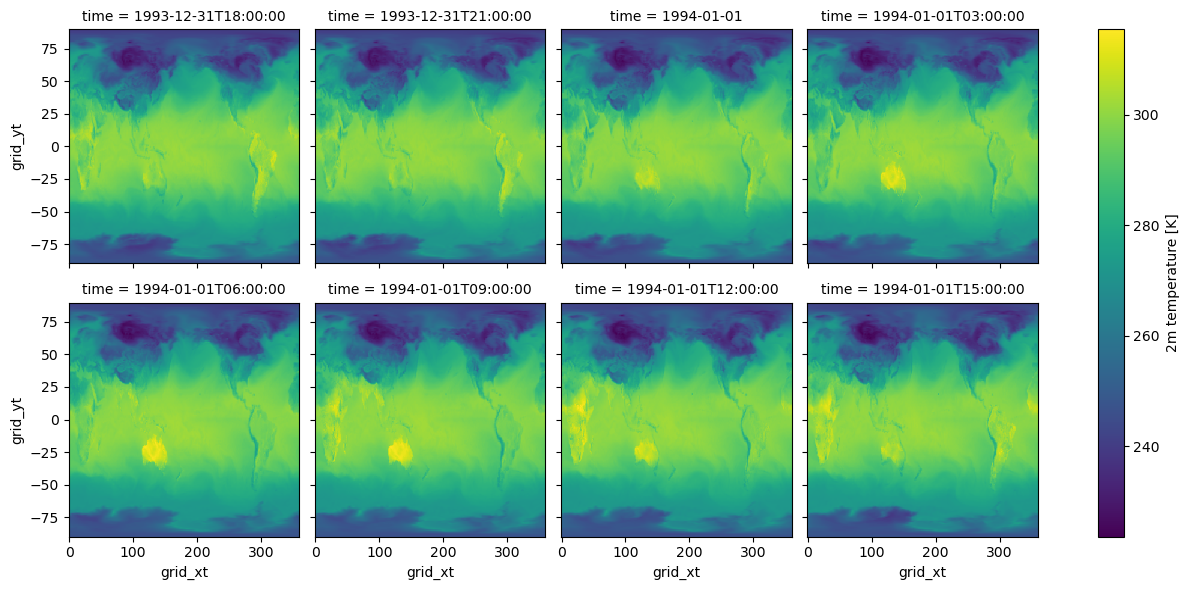

In [11]:
%%time
ds1.tmp2m.isel(time=slice(8)).plot(col="time", col_wrap=4)